In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', index_col='car name')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
cats = list(df.select_dtypes(include=['object']).columns)
print(cats)

['horsepower']


In [5]:
nums = list(df.select_dtypes(exclude=['object']).columns)
print(nums)

['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [8]:
data = df.copy()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
data['Country'] = data.origin.replace([1, 2, 3], ['USA', 'Europe', 'Japan'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country
car name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140,3449,10.5,70,1,USA


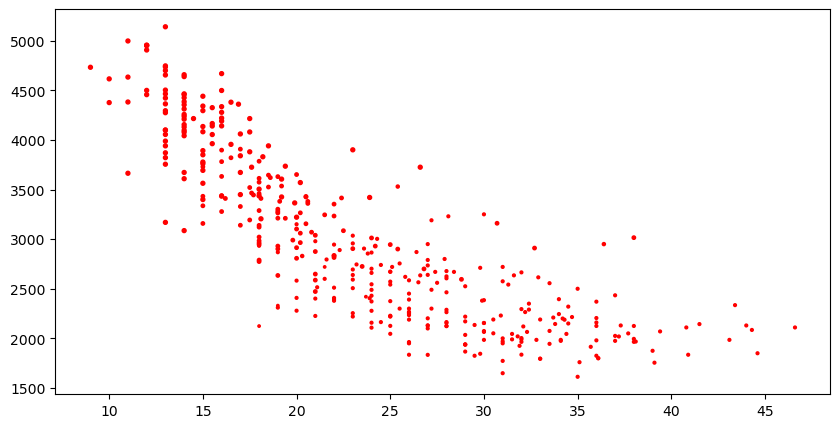

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.scatter(x=data.mpg, y=data['weight'], color='red', s=data.cylinders) # s = size of the dots

In [17]:
# don't just call matplotlib functions on its own or data is lost, make figure for back reference

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

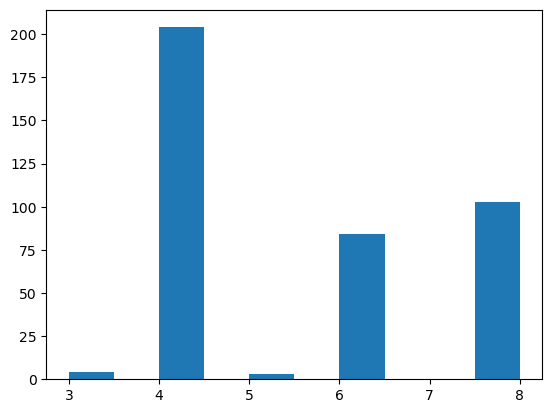

In [19]:
plt.hist(data.cylinders) #, bins=5, color='red', edgecolor='black', alpha=0.5)

<Axes: xlabel='weight', ylabel='mpg'>

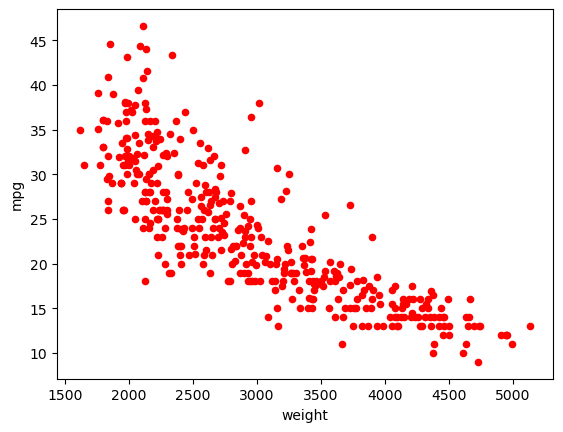

In [22]:
data.plot(x='weight', y='mpg', kind='scatter', color='r') #, s=data.cylinders, figsize=(10, 5)

<Axes: xlabel='weight', ylabel='mpg'>

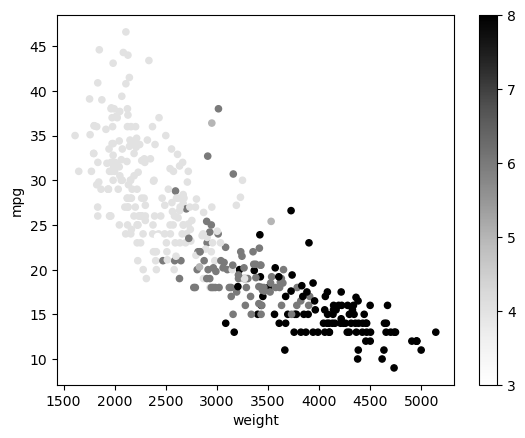

In [25]:
data.plot(x='weight', y='mpg', kind='scatter', color=data.cylinders, colorbar=True) #, s=data.cylinders, figsize=(10, 5)

<Axes: >

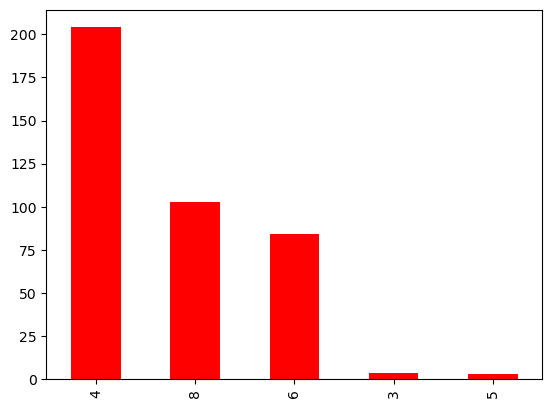

In [26]:
data['cylinders'].value_counts().plot(kind='bar', color='r')

<Axes: ylabel='cylinders'>

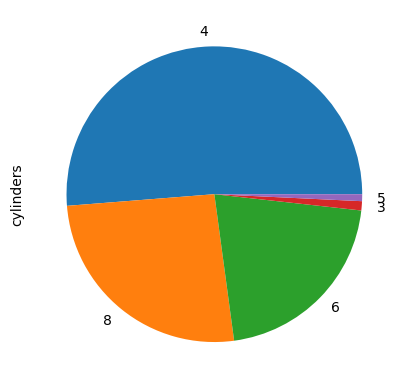

In [33]:
data['cylinders'].value_counts().plot(kind='pie') # explode = [0.1, 0, 0, 0]?

Text(0.5, 1.0, 'Scatterplot of MPG vs Acceleration')

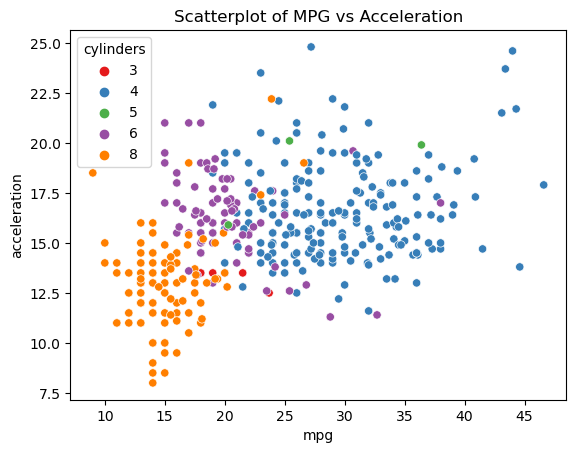

In [35]:
sp1 = sns.scatterplot(data=data, x='mpg', y='acceleration', hue='cylinders', palette='Set1')
sp1.set_title('Scatterplot of MPG vs Acceleration')

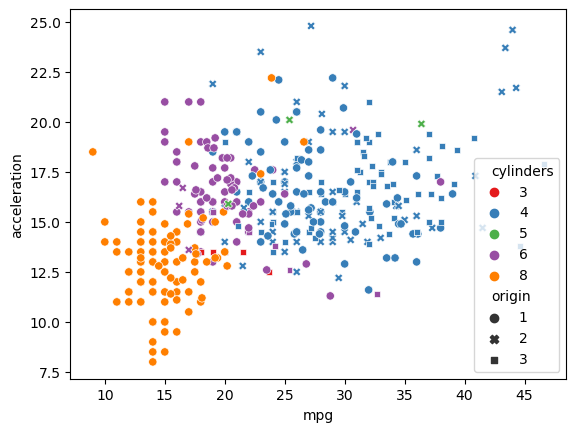

In [36]:
sp3 = sns.scatterplot(data=data, x='mpg', y='acceleration', hue='cylinders', palette='Set1', style='origin')

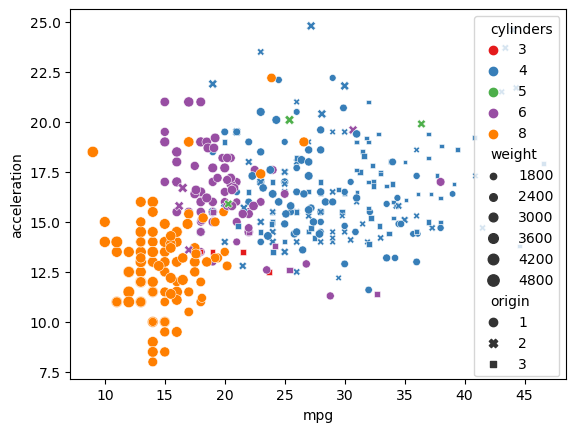

In [37]:
sp4 = sns.scatterplot(data=data, x='mpg', y='acceleration', hue='cylinders', palette='Set1', style='origin', size='weight')

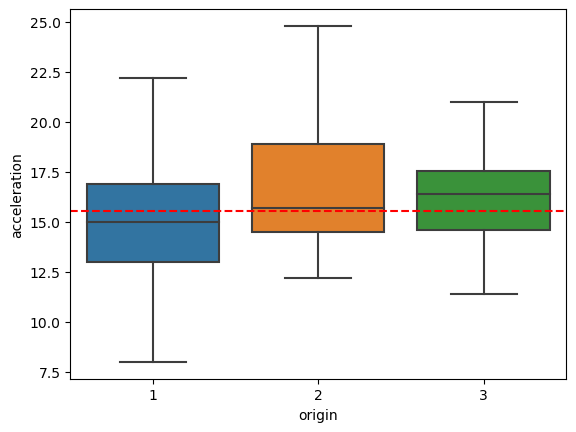

In [42]:
bx1 = sns.boxplot(data=data, x='origin', y='acceleration')
plt.axhline(data.acceleration.mean(), color='r', linestyle='--') # or linestyle='dashed'

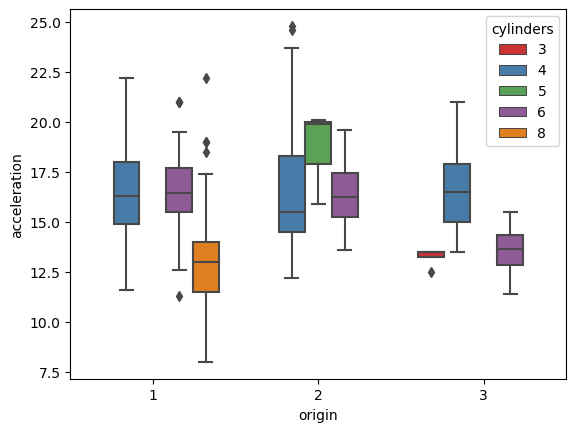

In [43]:
bx2 = sns.boxplot(data=data, x='origin', y='acceleration',
                  hue='cylinders', palette='Set1')

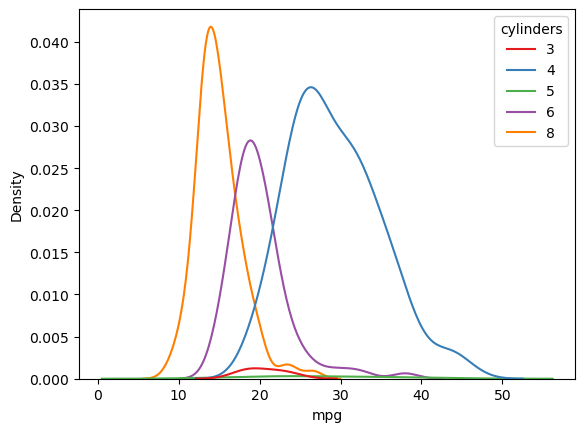

In [47]:
kde1 = sns.kdeplot(data=data, x='mpg', hue='cylinders', palette='Set1')

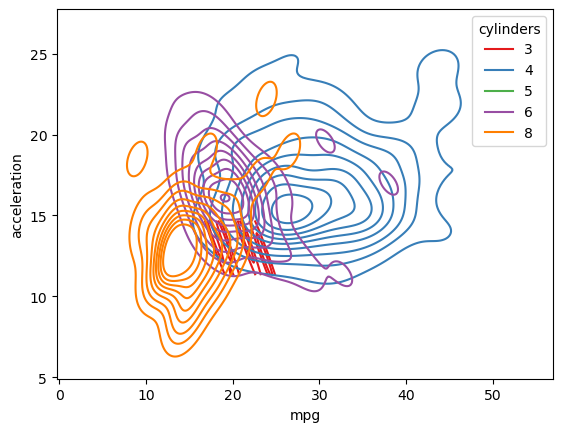

In [49]:
kde1 = sns.kdeplot(data=data, x='mpg', y='acceleration', hue='cylinders', palette='Set1')

In [50]:
data = data[~data.duplicated()]

<Axes: xlabel='mpg', ylabel='Count'>

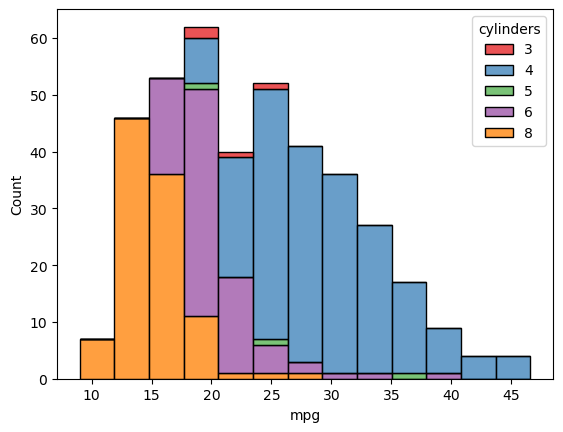

In [52]:
sns.histplot(data=data, x='mpg', hue='cylinders', palette='Set1', multiple='stack')

In [55]:
data.shape

(398, 9)

C:\Users\Optimal\AppData\Local\Temp\ipykernel_23484\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

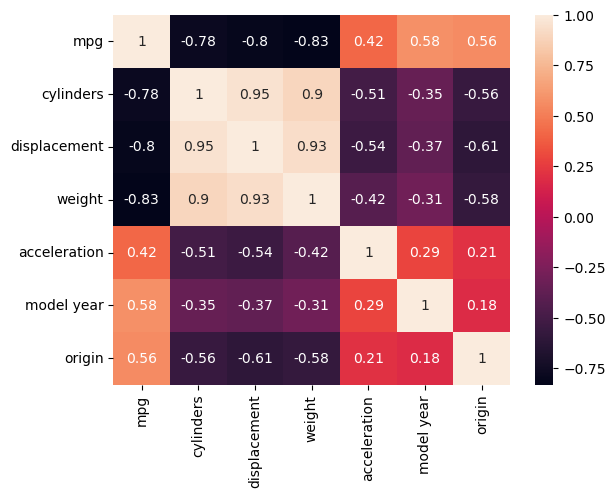

In [54]:
sns.heatmap(data.corr(), annot=True)